In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
import seaborn as sns

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# read file from csv
df = pd.read_csv('data/movies_metadata.csv')
# Complete data set is located in 
# https://www.kaggle.com/rounakbanik/the-movies-dataset/
# The Movies Dataset
#   ****************** Better not to load them because jupyter will crash
#   ****************** Use the smaller data set from 'data' directory


In [2]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [3]:
df.shape

(117, 24)

In [4]:
marvel_productions = df[df['production_companies'].str.contains('Marvel')]


In [5]:
marvel_productions.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
11,False,"{'id': 735, 'name': 'Blade Collection', 'poste...",45000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",http://www.warnerbros.com/blade,36647,tt0120611,en,Blade,When Blade's mother was bitten by a vampire du...,...,1998-08-21,131183530,120.00,"[{'iso_639_1': 'ru', 'name': 'Pусский'}, {'iso...",Released,Part Man. Part Vampire. All Hero.,Blade,False,6.50,1950
15,False,"{'id': 748, 'name': 'X-Men Collection', 'poste...",75000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,36657,tt0120903,en,X-Men,"Two mutants, Rogue and Wolverine, come to a pr...",...,2000-07-13,296339527,104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Evolution Begins,X-Men,False,6.80,4172
16,False,NaN,6000000,"[{'id': 16, 'name': 'Animation'}]",NaN,1857,tt0092106,en,The Transformers: The Movie,The Autobots must stop a colossal planet-consu...,...,1986-08-08,5849647,84.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Beyond good. Beyond evil. Beyond your wildest ...,The Transformers: The Movie,False,7.10,134
19,False,"{'id': 735, 'name': 'Blade Collection', 'poste...",54000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...",http://www.warnerbros.com/blade-ii,36586,tt0187738,en,Blade II,A rare mutation has occurred within the vampir...,...,2002-03-22,155010032,117.00,"[{'iso_639_1': 'cs', 'name': 'Český'}, {'iso_6...",Released,Faster. Sharper. Deadlier.,Blade II,False,6.30,1556
20,False,"{'id': 556, 'name': 'Spider-Man Collection', '...",139000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",http://www.sonypictures.com/movies/spider-man/,557,tt0145487,en,Spider-Man,After being bitten by a genetically altered sp...,...,2002-05-01,821708551,121.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,With great power comes great responsibility.,Spider-Man,False,6.80,5398


In [6]:
marvel_productions = marvel_productions[['id','title', 'budget', 'revenue']]

In [7]:
marvel_productions

,id,title,budget,revenue
11,36647,Blade,45000000,131183530
15,36657,X-Men,75000000,296339527
16,1857,The Transformers: The Movie,6000000,5849647
19,36586,Blade II,54000000,155010032
20,557,Spider-Man,139000000,821708551
22,9480,Daredevil,78000000,179179718
23,36658,X2,110000000,407711549
24,1927,Hulk,137000000,245360480
26,7220,The Punisher,33000000,54700105
28,558,Spider-Man 2,200000000,783766341


In [8]:
marvel_productions.loc[(marvel_productions['budget'] == 0) | (marvel_productions['revenue'] == 0) ]
# REMOVE these rows because they contain zeroes

,id,title,budget,revenue
30,13995,Captain America,10000000,0
35,14609,Ultimate Avengers,0,6700000
58,13647,The Invincible Iron Man,0,5300000
59,63686,Thor: Tales of Asgard,0,3100000
60,15257,Hulk vs. Wolverine,0,0
61,30675,Planet Hulk,0,7000000
71,14830,Doctor Strange,0,0
80,284053,Thor: Ragnarok,0,0
88,119569,Marvel One-Shot: Item 47,0,0
93,14613,Next Avengers: Heroes of Tomorrow,0,3800000


In [9]:
marvel_clean = marvel_productions.drop(marvel_productions[(marvel_productions.budget <1) | (marvel_productions.revenue <1)].index)

In [10]:
marvel_clean


,id,title,budget,revenue
11,36647,Blade,45000000,131183530
15,36657,X-Men,75000000,296339527
16,1857,The Transformers: The Movie,6000000,5849647
19,36586,Blade II,54000000,155010032
20,557,Spider-Man,139000000,821708551
22,9480,Daredevil,78000000,179179718
23,36658,X2,110000000,407711549
24,1927,Hulk,137000000,245360480
26,7220,The Punisher,33000000,54700105
28,558,Spider-Man 2,200000000,783766341


In [11]:
marvel_clean.shape

(45, 4)

In [12]:
marvel_clean = marvel_clean.reset_index(drop=True)

In [13]:
marvel_clean


,id,title,budget,revenue
0,36647,Blade,45000000,131183530
1,36657,X-Men,75000000,296339527
2,1857,The Transformers: The Movie,6000000,5849647
3,36586,Blade II,54000000,155010032
4,557,Spider-Man,139000000,821708551
5,9480,Daredevil,78000000,179179718
6,36658,X2,110000000,407711549
7,1927,Hulk,137000000,245360480
8,7220,The Punisher,33000000,54700105
9,558,Spider-Man 2,200000000,783766341


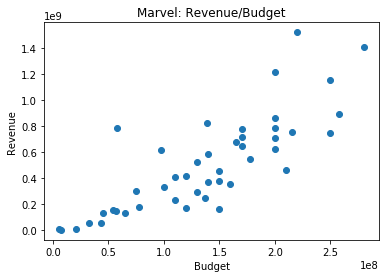

In [14]:
from matplotlib.pyplot import subplots, show
fig, ax = subplots()
ax.plot(marvel_clean['budget'], marvel_clean['revenue'], 'o')
ax.set_xlabel("Budget")
ax.set_ylabel("Revenue")
ax.set_title("Marvel: Revenue/Budget");
show()

In [15]:
ratedf = pd.read_csv('data/aratings.csv')

In [16]:
ratedf.columns


Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [17]:
ratedf.shape

(39318, 4)

In [18]:
ratedf.head(10)

,userId,movieId,rating,timestamp
0,12,759,5.00,943911542
1,24,1979,2.00,979972447
2,30,1250,5.00,976916140
3,34,1250,5.00,1498762448
4,46,1771,2.00,979331419
5,47,1250,4.00,970512068
6,49,1250,4.00,1149444975
7,51,1250,5.00,1218161521
8,56,1250,3.50,1410106035
9,61,1250,3.50,1071875870


In [19]:
# Need the movie id from the previous file/dataframe, marvel_clean
marvel = marvel_clean[['id','title']]

In [20]:
marvel

,id,title
0,36647,Blade
1,36657,X-Men
2,1857,The Transformers: The Movie
3,36586,Blade II
4,557,Spider-Man
5,9480,Daredevil
6,36658,X2
7,1927,Hulk
8,7220,The Punisher
9,558,Spider-Man 2


In [21]:
marvel_ids = marvel['id']

In [22]:
marvel_ids

0      36647
1      36657
2       1857
3      36586
4        557
5       9480
6      36658
7       1927
8       7220
9        558
10     36648
11      9947
12      9738
13     18882
14     36668
15      1250
16       559
17      1979
18      1726
19      1724
20     13056
21      2080
22     10138
23     10195
24     49538
25      1771
26     24428
27     71676
28      1930
29     68721
30     76170
31     76338
32    100402
33    102382
34    127585
35    118340
36     99861
37    102899
38    166424
39    293660
40    283995
41    271110
42    284052
43    246655
44    263115
Name: id, dtype: int64

In [23]:
ratedf.rename(columns={'movieId':'id'}, inplace=True)

In [24]:
ratedf.columns

Index(['userId', 'id', 'rating', 'timestamp'], dtype='object')

In [25]:
df_inner = pd.merge(marvel, ratedf, on='id', how='inner')

In [26]:
df_inner.to_csv('inn.csv')

In [27]:
df_inner.head(20)

,id,title,userId,rating,timestamp
0,1857,The Transformers: The Movie,611,3.00,941812872
1,1857,The Transformers: The Movie,2668,3.00,943897757
2,1857,The Transformers: The Movie,2975,3.50,1180658313
3,1857,The Transformers: The Movie,3588,4.00,1039561933
4,1857,The Transformers: The Movie,4323,3.00,963237718
5,1857,The Transformers: The Movie,5229,4.00,1047151343
6,1857,The Transformers: The Movie,5708,3.00,959007011
7,1857,The Transformers: The Movie,6282,2.50,1118188147
8,1857,The Transformers: The Movie,6513,3.00,1146068666
9,1857,The Transformers: The Movie,7201,3.00,912247859


In [28]:
movie_title = df_inner.title.unique()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

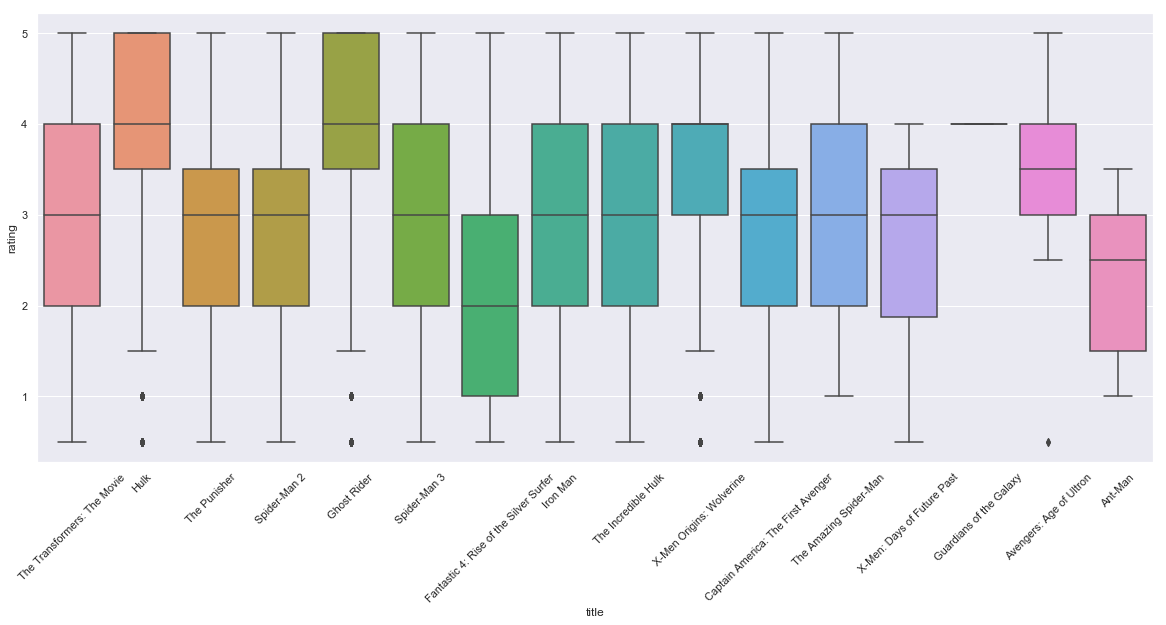

In [29]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.boxplot(x=df_inner['title'], y=df_inner['rating'])
plt.xticks(rotation=45)